In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from os import listdir
from os.path import isfile, join

In [43]:
df = pd.read_csv("data/results.csv", sep=";")
df.drop("Unnamed: 9", axis=1,inplace=True)

###### CONSTANTS
MAX_YLIM = [0,100]

# Matched Points - Neighborhood Evaluation

Some observations:

* AKAZE, BRISK, ORB and SIFT provide keypoints in different dimensions due to their multilevel keypoint detection.
    * ORB create the biggest radius keypoints while AKAZE create the smallest keypoint size variation.
* By using BF Matching + KNN + Ratio Test, the matched points showed a really good result, *i.e.*, there almost no diagonal maching points between sequences of images
* Points seems to be uniformly distributed over the edges of the car's laterals and the car's plate.

AKAZE_AKAZE_1.jpg


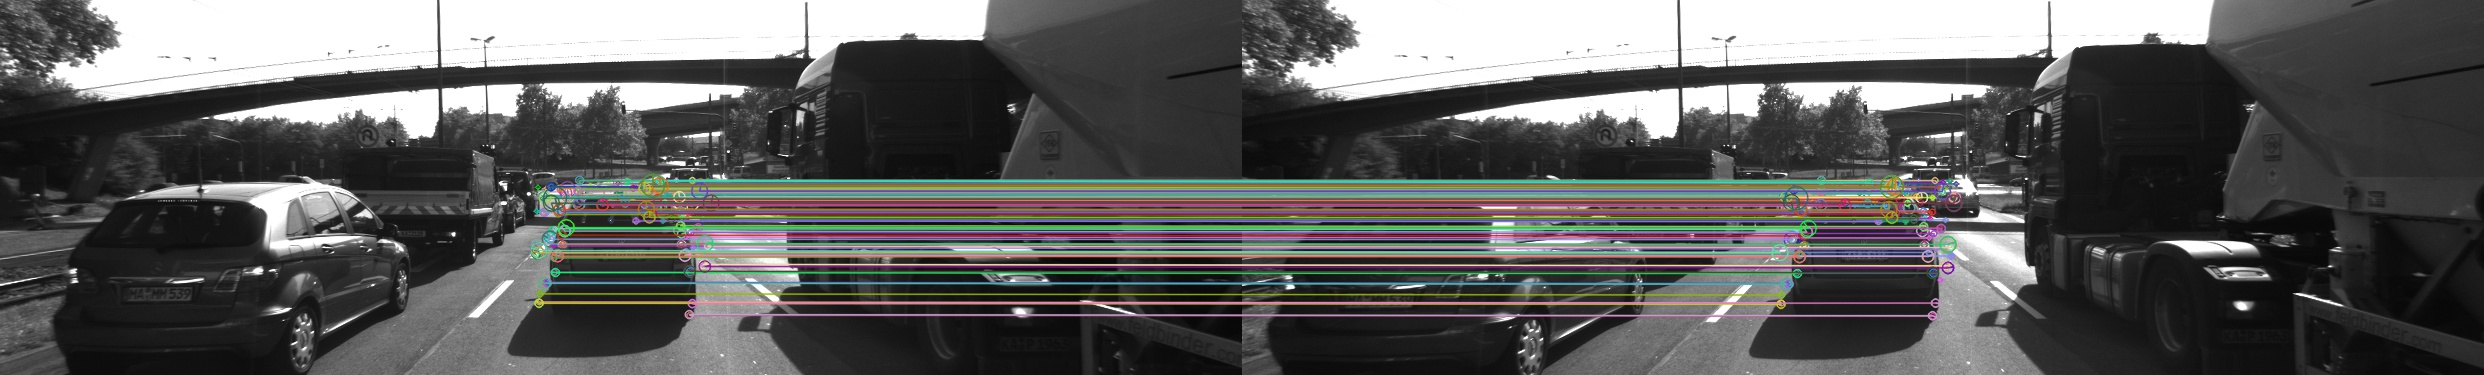

BRISK_BRISK_1.jpg


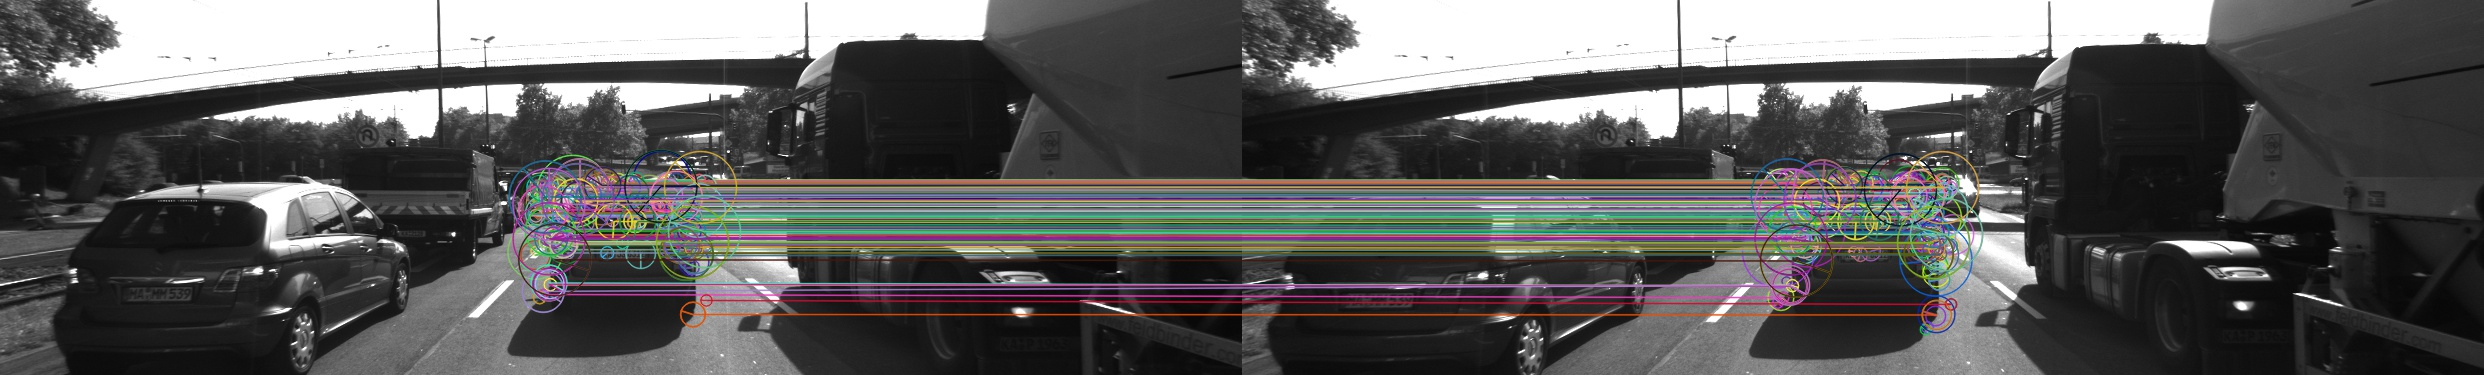

FAST_BRIEF_1.jpg


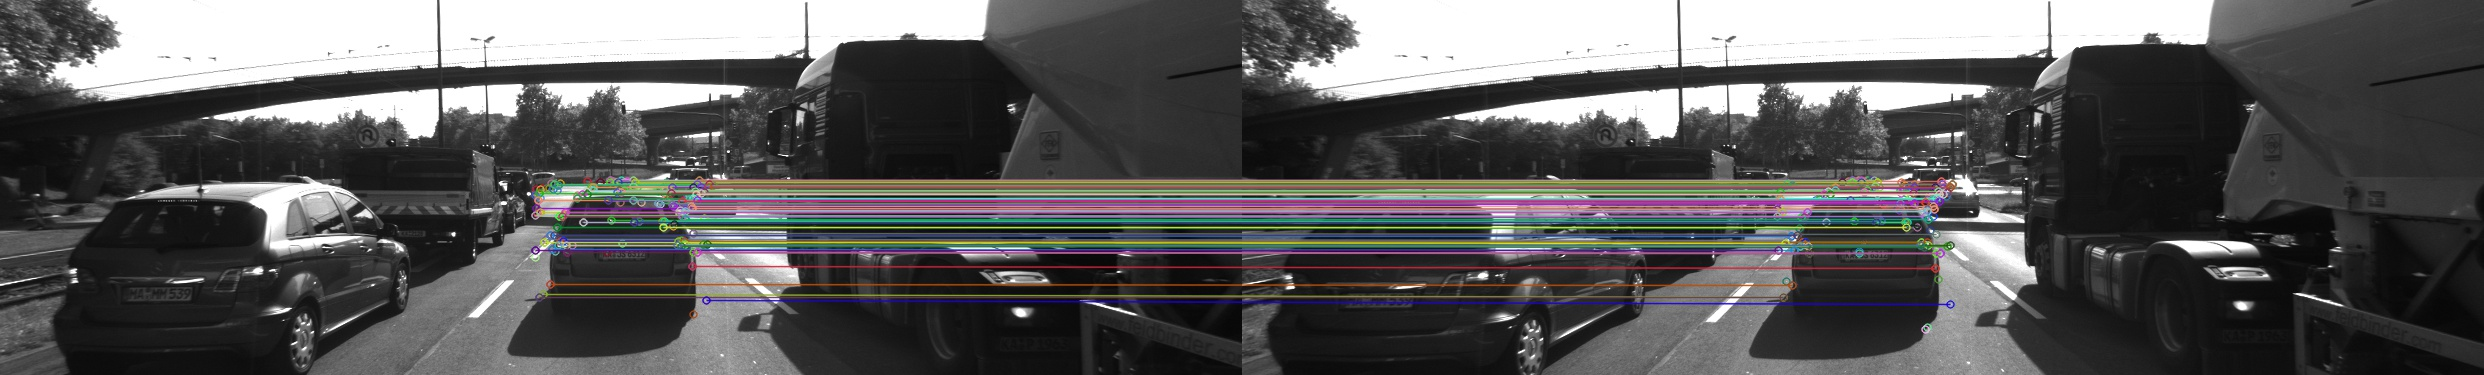

FAST_BRISK_1.jpg


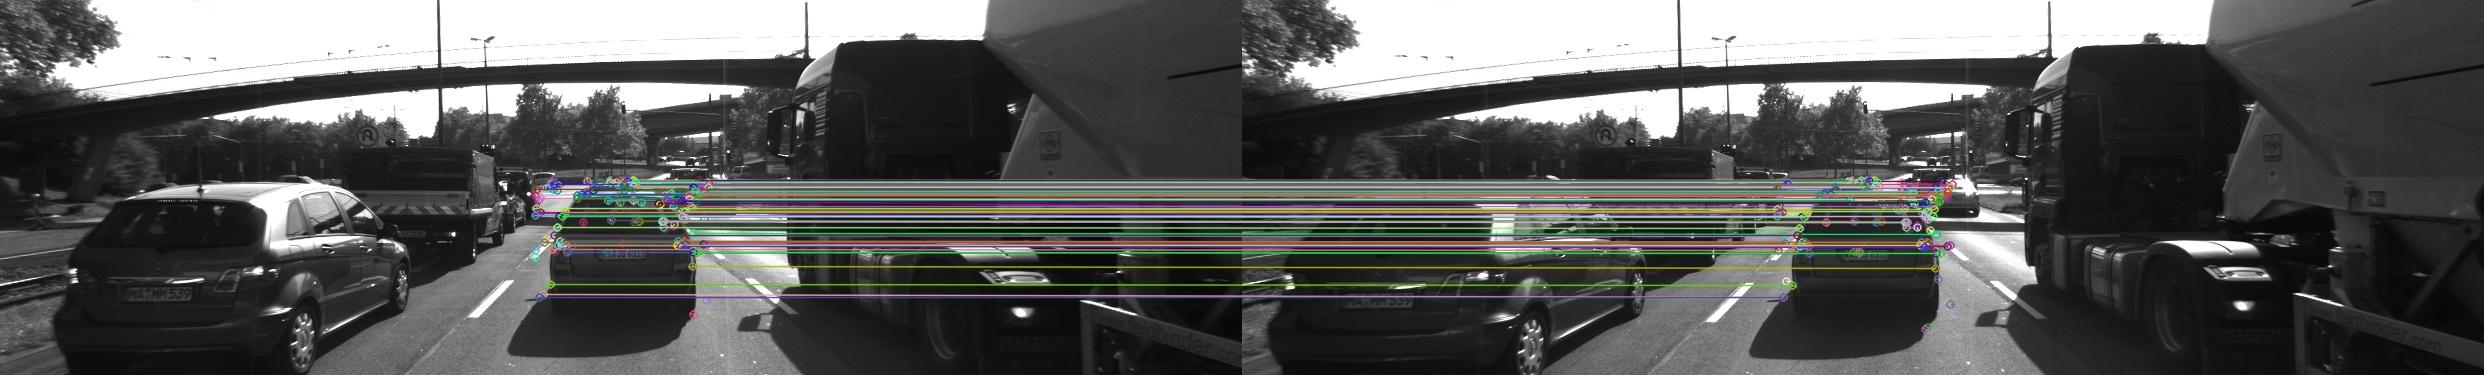

FAST_FREAK_1.jpg


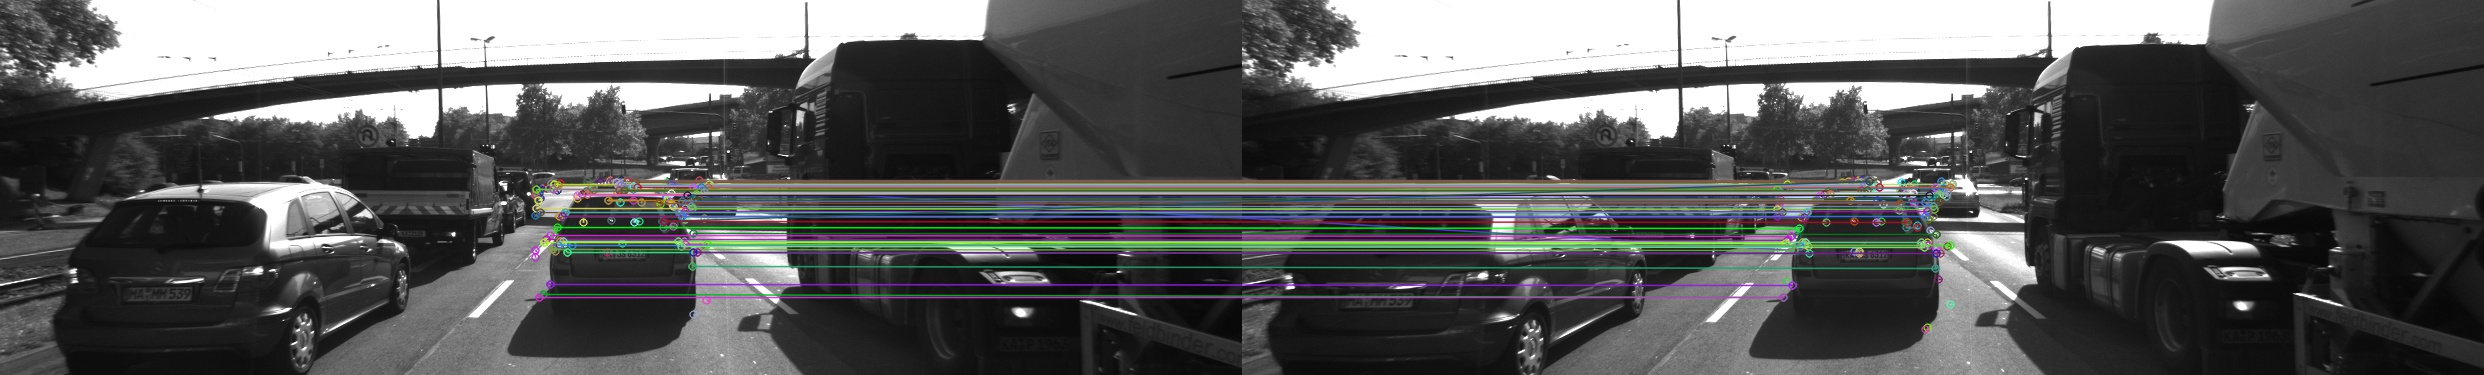

HARRIS_SIFT_1.jpg


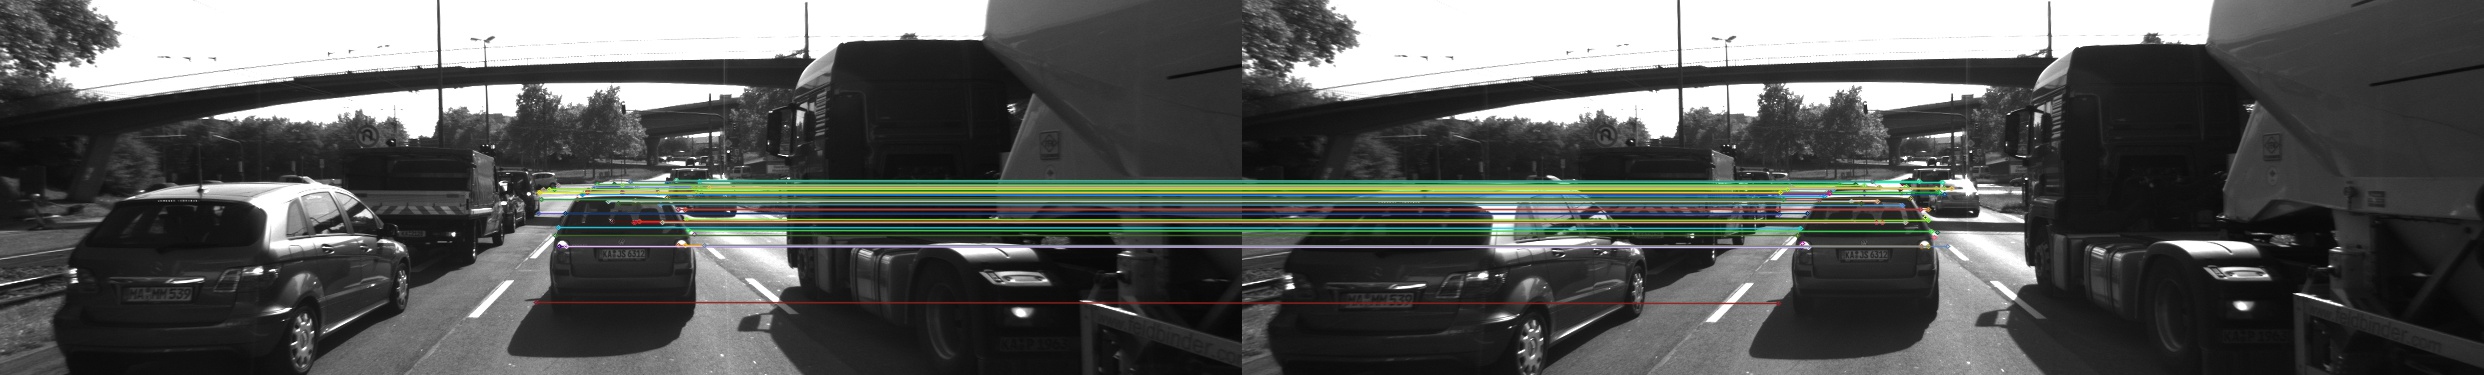

ORB_ORB_1.jpg


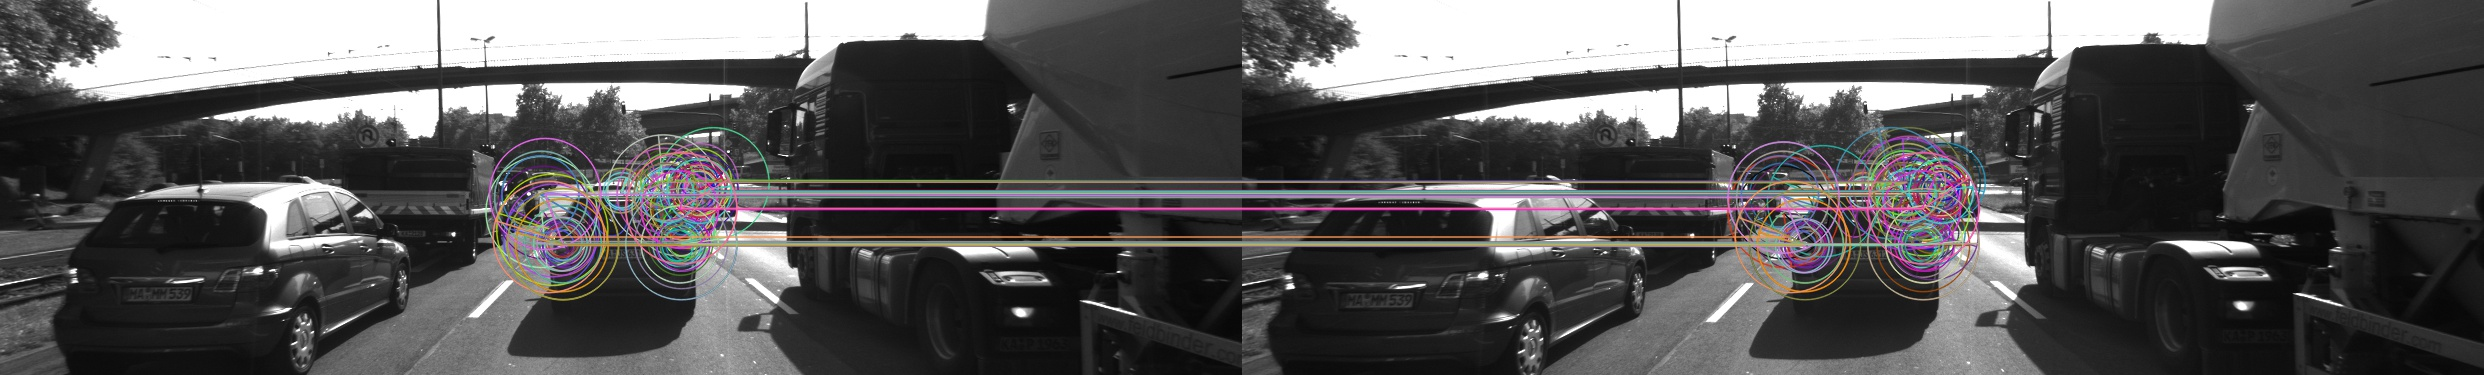

SHITOMASI_SIFT_1.jpg


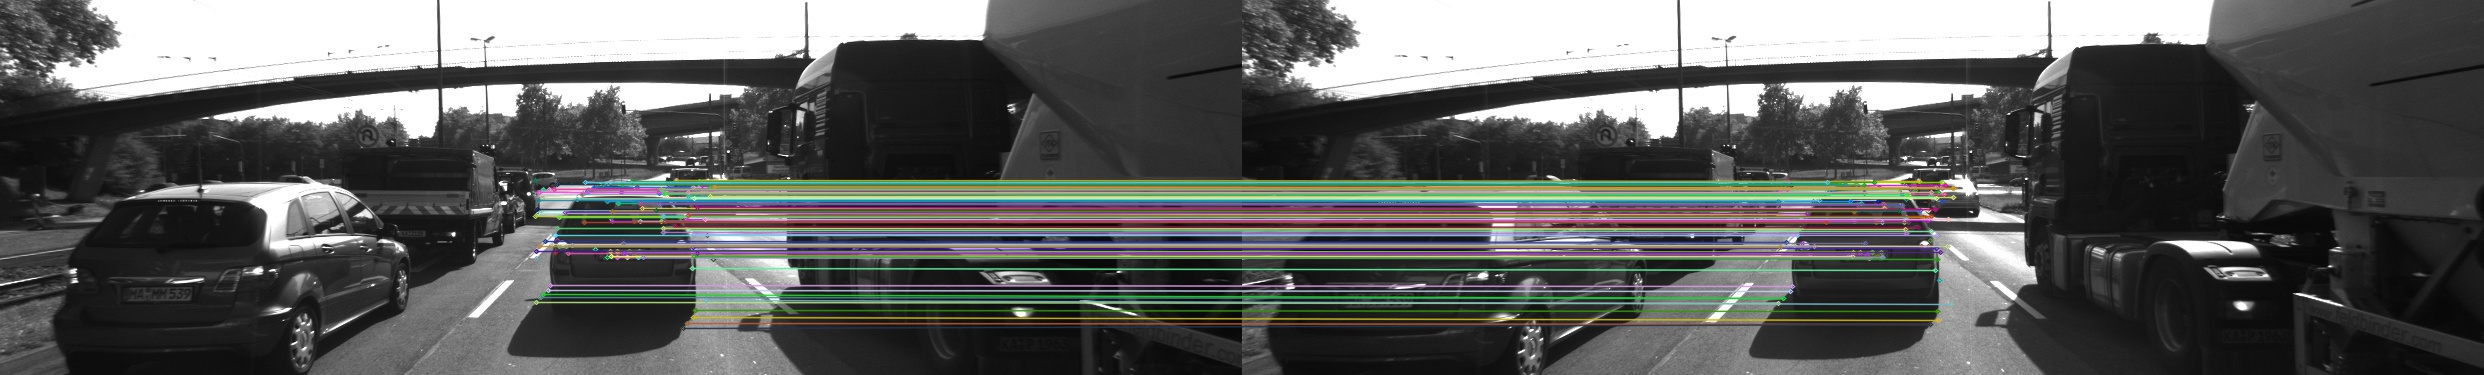

SIFT_BRIEF_1.jpg


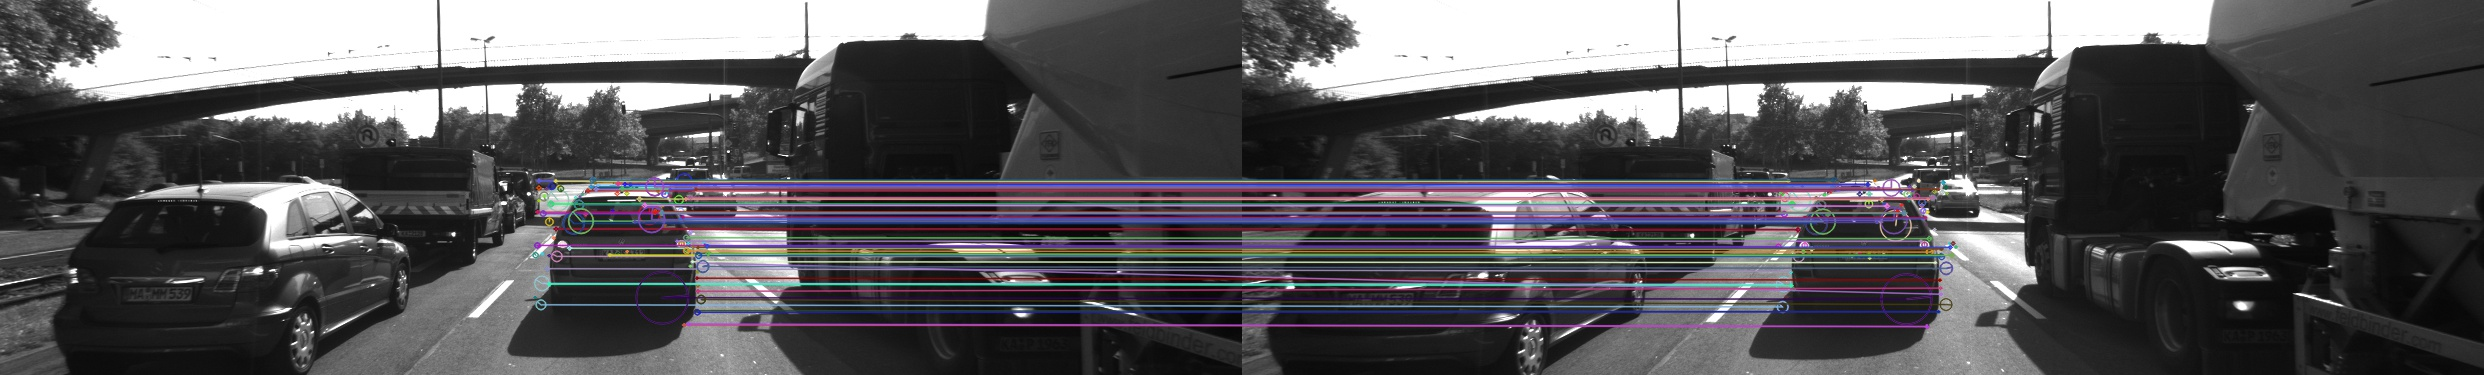

SIFT_FREAK_1.jpg


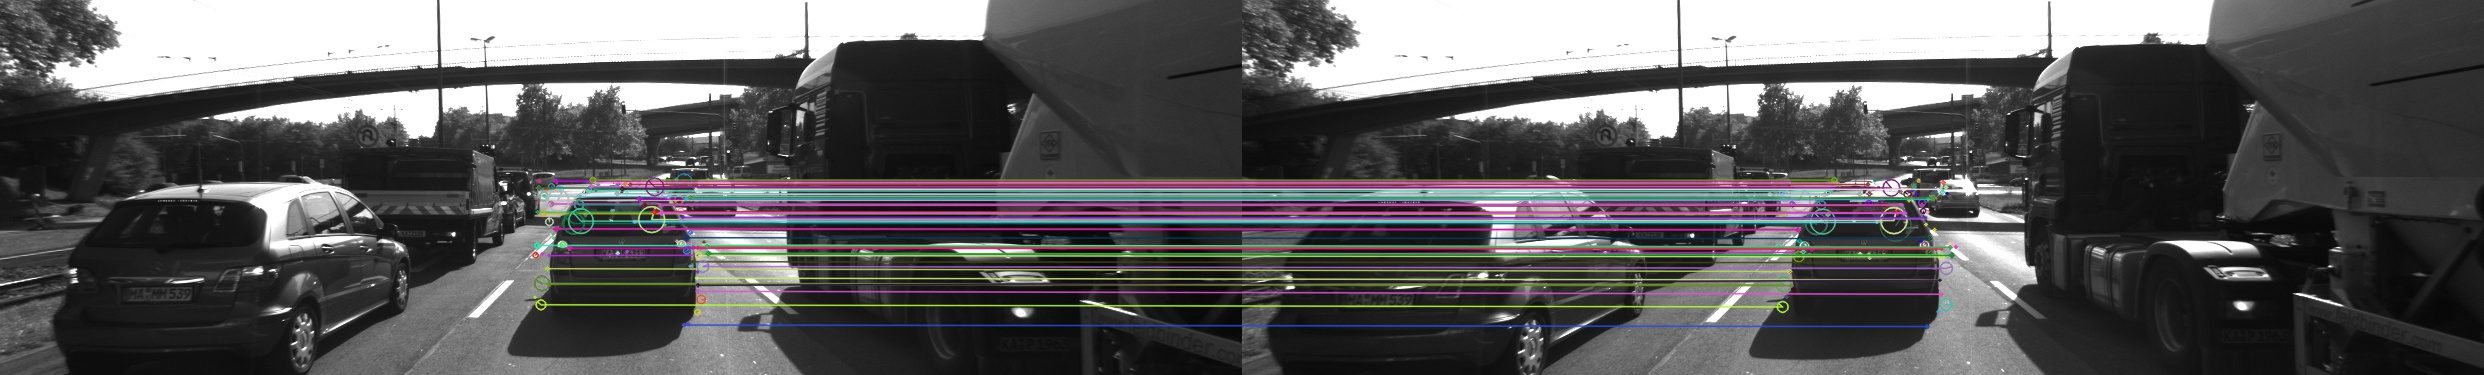

SIFT_SIFT_1.jpg


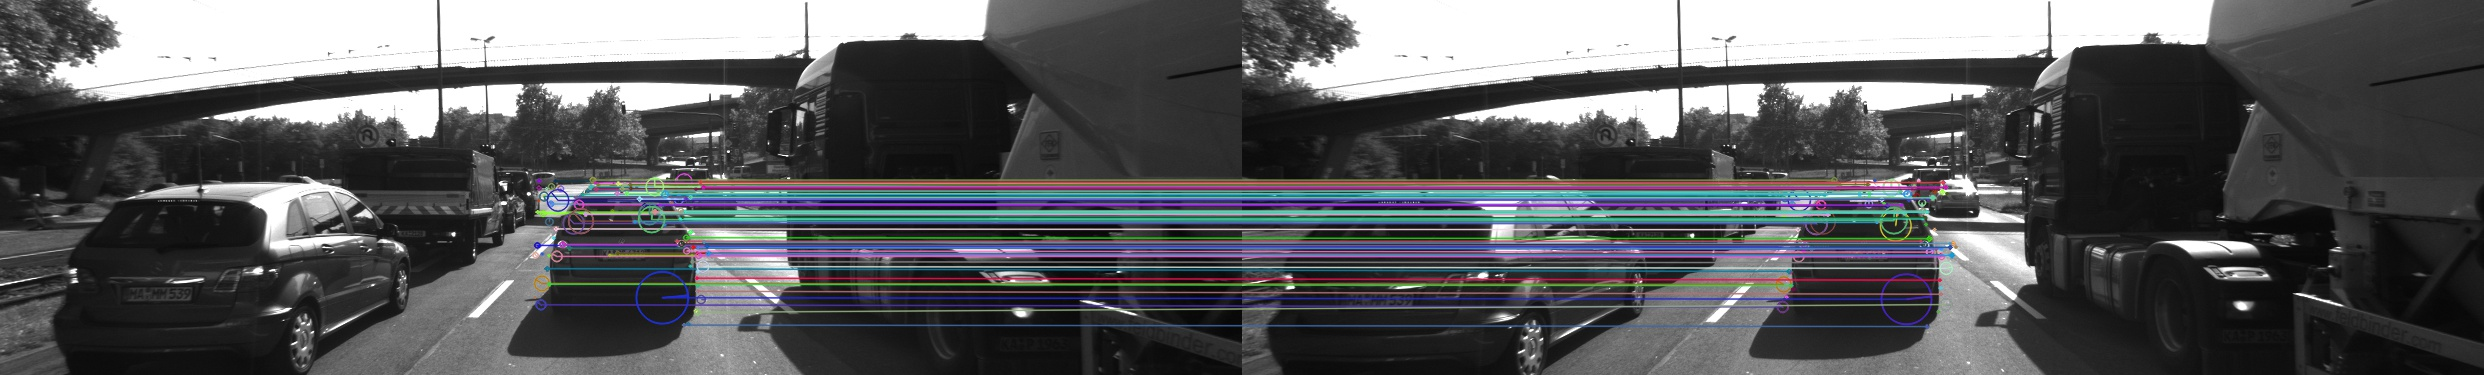

In [38]:
# show images
# take 1 photo (that ends with "1") for each combination detector/descriptor

onlyfiles = np.array([f for f in listdir(images_dir) if isfile(join(images_dir, f))])
filter_str = "1" 
chosen_files = [ix for ix, elem in enumerate(onlyfiles) if filter_str in elem]
chosen_files = sorted(onlyfiles[chosen_files])

for im in chosen_files:
    print(im)
    display(Image(filename=images_dir + "/" + im, width = 1000, height = 800))

# Statistics on Execution Time

## Detector, Descriptor and Matcher Average Execution Time

* **Detectors** AKAZE and SIFT  were the slowest, while FAST was distinctively the fastest
* **Descriptors** AKAZE and SIFT again were the slowest while BRISK was the fastest. However, among the fastest descriptors, no significant difference is perceived.
* **Matchers** When Maching with BRISK, the BF Matcher + KNN + Ratio Test takes the longest while HARRIS is the fastest, but also with no big difference among the faster results.

detectorTime(ms)            descriptorTime(ms)             \
                         mean        std               mean        std   
detectorType                                                             
AKAZE               75.264090  19.227434          65.424850  25.549001   
BRISK               36.443460   1.659547           3.485906   0.731275   
FAST                 0.788629   0.065972           8.324330  10.108254   
HARRIS              10.199198   1.178375          13.864790   4.376075   
ORB                  9.301569   9.200367           9.015415   0.909257   
SHITOMASI           11.419480   0.638433          13.140840   0.498580   
SIFT                92.336710   9.250260          31.217990  27.680665   

             match_time(ms)            
                       mean       std  
detectorType                           
AKAZE              0.560525  0.253364  
BRISK              1.222254  0.481163  
FAST               0.430996  0.163387  
HARRIS             0.129121  0.057987  
ORB                0.232727  0.116598  
SHITOMASI          0.244012  0.092640  
SIFT               0.323056  0.127329

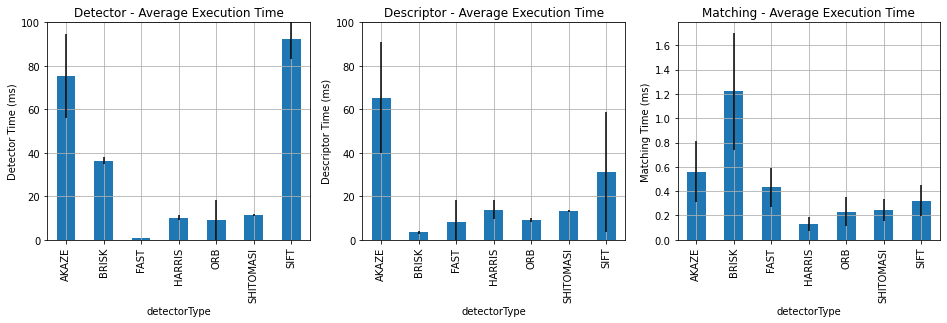

In [61]:
fig, ax = plt.subplots(1,3, figsize=[16,4])
df_agg = df.groupby("detectorType")[["detectorTime(ms)", "descriptorTime(ms)", "match_time(ms)"]].agg([np.mean, np.std])
display(df_agg)

df_agg["detectorTime(ms)"]["mean"].plot.bar(yerr=df_agg["detectorTime(ms)"]["std"], ax=ax[0])
ax[0].set_title("Detector - Average Execution Time")
ax[0].set_ylabel("Detector Time (ms)")
ax[0].set_ylim(MAX_YLIM)
ax[0].grid()

df_agg["descriptorTime(ms)"]["mean"].plot.bar(yerr=df_agg["descriptorTime(ms)"]["std"], ax=ax[1])
ax[1].set_title("Descriptor - Average Execution Time")
ax[1].set_ylabel("Descriptor Time (ms)")
ax[1].set_ylim(MAX_YLIM)
ax[1].grid()

df_agg["match_time(ms)"]["mean"].plot.bar(yerr=df_agg["match_time(ms)"]["std"], ax=ax[2])
ax[2].set_title("Matching - Average Execution Time")
ax[2].set_ylabel("Matching Time (ms)")
ax[2].grid();

## KeyPoints Statistics

* ORB noticiably produces the biggest radius but also detects and matches the smallest number of points

detectectedKeypoints             averageKPSize            \
                               mean         std          mean       std   
descriptorType                                                            
AKAZE                   1343.000000   17.081504      7.482975  0.079109   
BRIEF                   1586.750000  210.275728      6.014726  1.013429   
BRISK                   2249.500000  476.267892     13.094385  6.253689   
FREAK                   1586.750000  210.275728      6.014726  1.013429   
ORB                      500.000000    0.000000     53.924600  0.000000   
SIFT                    1080.533333  409.720235      1.676484  2.412141   

               matchedKeypoints             
                           mean        std  
descriptorType                              
AKAZE                117.200000  42.023274  
BRIEF                 75.750000  31.950414  
BRISK                103.700000  45.927976  
FREAK                 57.850000  22.873278  
ORB                   51.500000  20.764553  
SIFT                  72.866667  33.083732

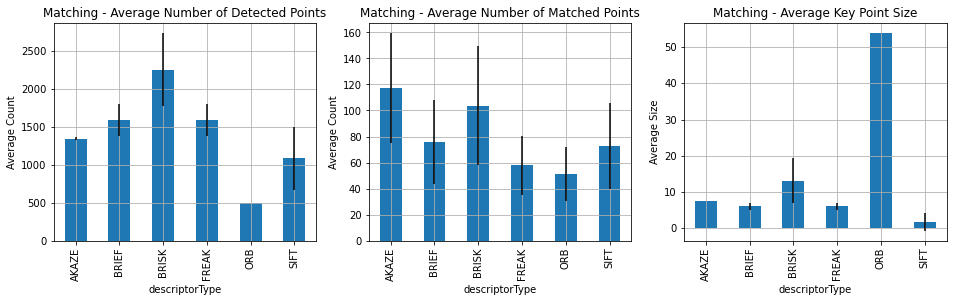

In [63]:
df_agg = df.groupby(["descriptorType"])[["detectectedKeypoints", "averageKPSize", "matchedKeypoints"]].agg([np.mean, np.std])
display(df_agg)

fig, ax = plt.subplots(1,3,figsize=[16,4])
df_agg["detectectedKeypoints"]["mean"].plot.bar(yerr=df_agg["detectectedKeypoints"]["std"], ax=ax[0])
ax[0].set_title("Matching - Average Number of Detected Points")
ax[0].set_ylabel("Average Count")
ax[0].grid()

df_agg["matchedKeypoints"]["mean"].plot.bar(yerr=df_agg["matchedKeypoints"]["std"], ax=ax[1])
ax[1].set_title("Matching - Average Number of Matched Points")
ax[1].set_ylabel("Average Count")
ax[1].grid()

df_agg["averageKPSize"]["mean"].plot.bar(yerr=df_agg["averageKPSize"]["std"], ax=ax[2])
ax[2].set_title("Matching - Average Key Point Size")
ax[2].set_ylabel("Average Size")
ax[2].grid()